In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
import math

In [124]:
class anomaly_detector:
    
    def __init__(self,prob=0.01):
        self.target=None
        self.prob=prob
        self.mean=None
        self.std=None
        
    def fit(self,x):
        self.mean=np.mean(x,axis=0)
        self.std=np.std(x,axis=0)
                
    def predict(self,x):
        self.target=np.zeros((x.shape[0],))
        for i in range(x.shape[0]):
            probablity=1
            for tpl in zip(x[i,:],self.mean,self.std):
                probablity*=self.probablity_function(tpl[0],tpl[1],tpl[2])
            if probablity>=self.prob:
                self.target[i]=1
        return self.target
    
    def probablity_function(self,vector,mu,sigma):
        return (1/(sigma*math.sqrt(2*math.pi)))*np.exp(-(vector-mu)**2/(2*sigma))

In [296]:
def best_epsilon(x_validation,y_validation,paramList):
    best_epsilon=0
    best_f1_score=0
    for param in paramList:
        model=anomaly_detector(param)
        model.fit(x_validation)
        pred=model.predict(x_validation)
        f1s=f1_score(y_validation,pred)
        if f1s>best_f1_score:
            best_f1_score=f1s
            best_epsilon=param
    return {'best_epsilon':best_epsilon,'best_f1_score':best_f1_score}

In [236]:
data=np.random.randn(500,2)
data*=1.2
data[0:10,:]=data[0:10,:]+10*np.random.rand(1)
data[10:20,:]=data[10:20,:]-7*np.random.rand(1)

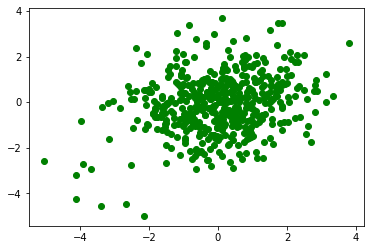

In [237]:
plt.scatter(data[:,0],data[:,1],c='green')

(array([[ 1.,  0.,  0.,  0.,  0.,  3.,  1.,  1.,  0.,  2.,  2.,  1.,  1.,
          2.,  5.,  4.,  9.,  7., 10., 12., 16., 10., 20., 21., 19., 28.,
         22., 27., 21., 35., 25., 31., 25., 29., 19., 14., 11., 13., 12.,
         12.,  6.,  7.,  3.,  4.,  5.,  0.,  2.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,
          4.,  6.,  6.,  9.,  4.,  8., 14., 16., 10., 19., 24., 25., 31.,
         24., 26., 31., 36., 25., 28., 27., 27., 15., 10., 12.,  9., 11.,
          9.,  6.,  3.,  3.,  3.,  2.,  2.,  1.,  1.,  2.,  1.]]),
 array([-5.03090603, -4.85465939, -4.67841276, -4.50216613, -4.3259195 ,
        -4.14967287, -3.97342624, -3.79717961, -3.62093298, -3.44468635,
        -3.26843971, -3.09219308, -2.91594645, -2.73969982, -2.56345319,
        -2.38720656, -2.21095993, -2.0347133 , -1.85846667, -1.68222003,
        -1.5059734 , -1.32972677, -1.15348014, -0.97723351, -0.80098688,
        -0.62474025, -0.44849362, -0.27224698, -0.09600035,

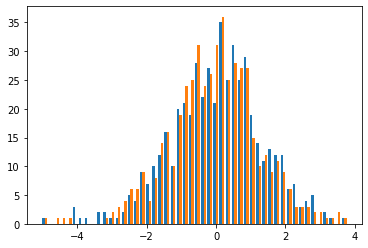

In [238]:
plt.hist(data,bins=50)

In [302]:
detector=anomaly_detector(0.001)

In [303]:
detector.fit(data)

In [304]:
y=detector.predict(data)

In [305]:
y

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

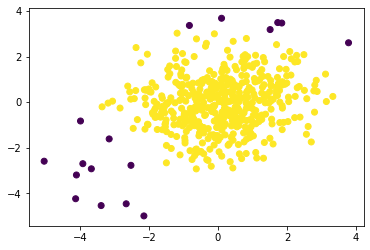

In [306]:
plt.scatter(data[:,0],data[:,1],c=y)

In [307]:
from sklearn.model_selection import KFold,GridSearchCV,train_test_split

In [308]:
y_normall=y[y==1]
y_unnormall=y[y==0]
data_normall=data[y==1]
data_unnormall=data[y==0]

In [309]:
xuv,xut,yuv,yut=train_test_split(data_unnormall,y_unnormall,test_size=0.5,shuffle=True)

In [310]:
xntr,xnt,yntr,ynt=train_test_split(data_normall,y_normall,test_size=0.5,shuffle=True)
xnv,xnt,ynv,ynt=train_test_split(xnt,ynt,test_size=0.6,shuffle=True)

In [311]:
x_train=xntr
y_train=yntr
x_validation=np.concatenate((xnv,xuv))
y_validation=np.concatenate((ynv,yuv))
x_test=np.concatenate((xnt,xut))
y_test=np.concatenate((ynt,yut))

In [312]:
from sklearn.metrics import f1_score       

In [317]:
prob=np.linspace(0.0001,2,num=1000)

In [318]:
bests=best_epsilon(x_validation,y_validation,prob)

In [319]:
bests

{'best_epsilon': 0.002101901901901902, 'best_f1_score': 1.0}

In [320]:
ep=bests.get('best_epsilon')

In [321]:
model=anomaly_detector(ep)
model.fit(x_train)
pred=model.predict(x_test)
print(pred)
f1_score(y_test,pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


0.9896193771626297

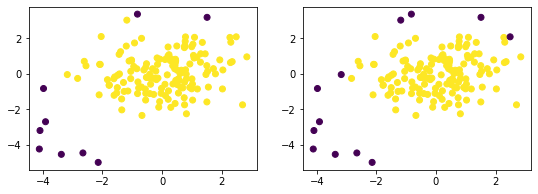

In [322]:
plt.figure(figsize=(9,3))
plt.subplot(121)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1],c=pred)
